In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [2]:
germination_data <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-9-1-germination.csv")
head(germination_data)

germination,size,solar,nutrition
<int>,<int>,<fct>,<int>
0,10,shade,1
0,10,shade,1
0,10,shade,1
0,10,shade,1
0,10,shade,1
0,10,shade,2


In [3]:
summary(germination_data)

  germination         size         solar      nutrition   
 Min.   : 0.00   Min.   :10   shade   :50   Min.   : 1.0  
 1st Qu.: 0.00   1st Qu.:10   sunshine:50   1st Qu.: 3.0  
 Median : 1.00   Median :10                 Median : 5.5  
 Mean   : 2.83   Mean   :10                 Mean   : 5.5  
 3rd Qu.: 4.00   3rd Qu.:10                 3rd Qu.: 8.0  
 Max.   :10.00   Max.   :10                 Max.   :10.0  

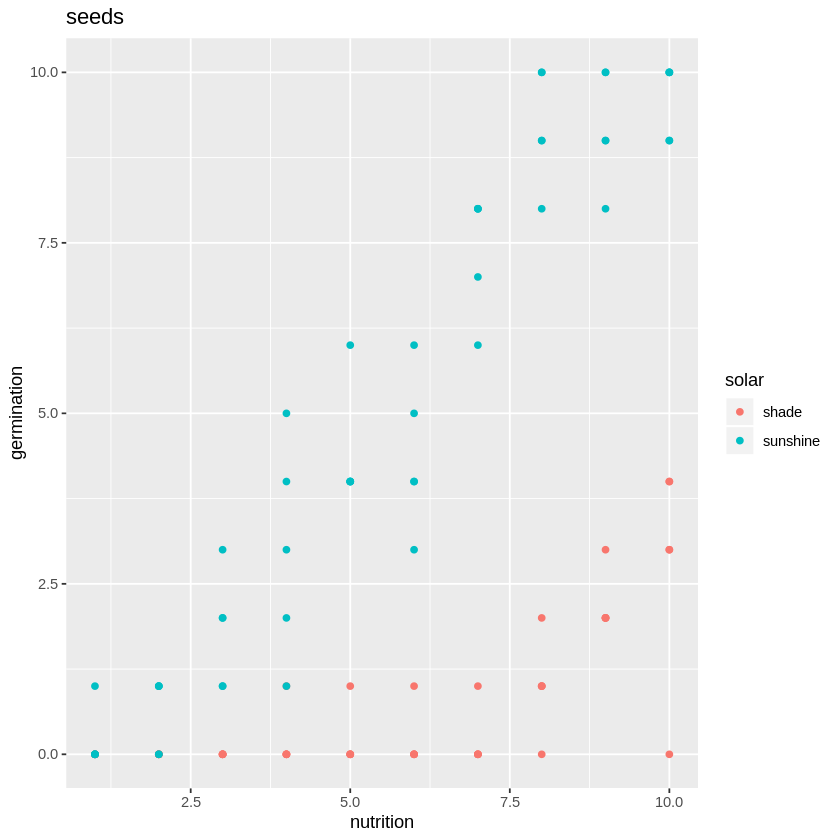

In [4]:
ggplot(data = germination_data, mapping = aes(x = nutrition, y = germination, color = solar)) + geom_point() + labs(title = "seeds")

In [7]:
glm_binom_brms <- brm(
    germination | trials(size) ~ solar + nutrition,
    family = binomial(),
    data = germination_data,
    seed = 1,
    prior = c(set_prior("", class = "Intercept"))
)
glm_binom_brms

Compiling the C++ model
Start sampling


 Family: binomial 
  Links: mu = logit 
Formula: germination | trials(size) ~ solar + nutrition 
   Data: germination_data (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept        -8.01      0.51    -9.06    -7.05       1224 1.01
solarsunshine     4.04      0.29     3.50     4.62       1400 1.00
nutrition         0.72      0.05     0.62     0.83       1549 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

In [8]:
newdata_1 <- data.frame(
    solar = c("shade", "sunshine", "sunshine"),
    nutrition = c(2, 2, 3),
    size = c(10, 10, 10)
)
newdata_1

solar,nutrition,size
<fct>,<dbl>,<dbl>
shade,2,10
sunshine,2,10
sunshine,3,10


In [9]:
linear_fit <- fitted(glm_binom_brms, newdata_1, scale = "linear")[,1]
fit <- 1 / (1 + exp(-linear_fit))
fit

[1] 0.001392684 0.073681459 0.140388491

In [10]:
odds_1 <- fit[1] / (1- fit[1])
odds_2 <- fit[2] / (1- fit[2])
odds_3 <- fit[3] / (1- fit[3])
coef <- fixef(glm_binom_brms)[, 1]
coef

Intercept solarsunshine     nutrition 
   -8.0139288     4.0436619     0.7193999

In [11]:
odds_2 / odds_1

[1] 57.03482

In [13]:
exp(coef["solarsunshine"])

solarsunshine 
     57.03482

In [14]:
odds_3 / odds_2

[1] 2.053201

In [15]:
exp(coef["nutrition"])

nutrition 
 2.053201

Using the median number of trials by default if not specified otherwise.


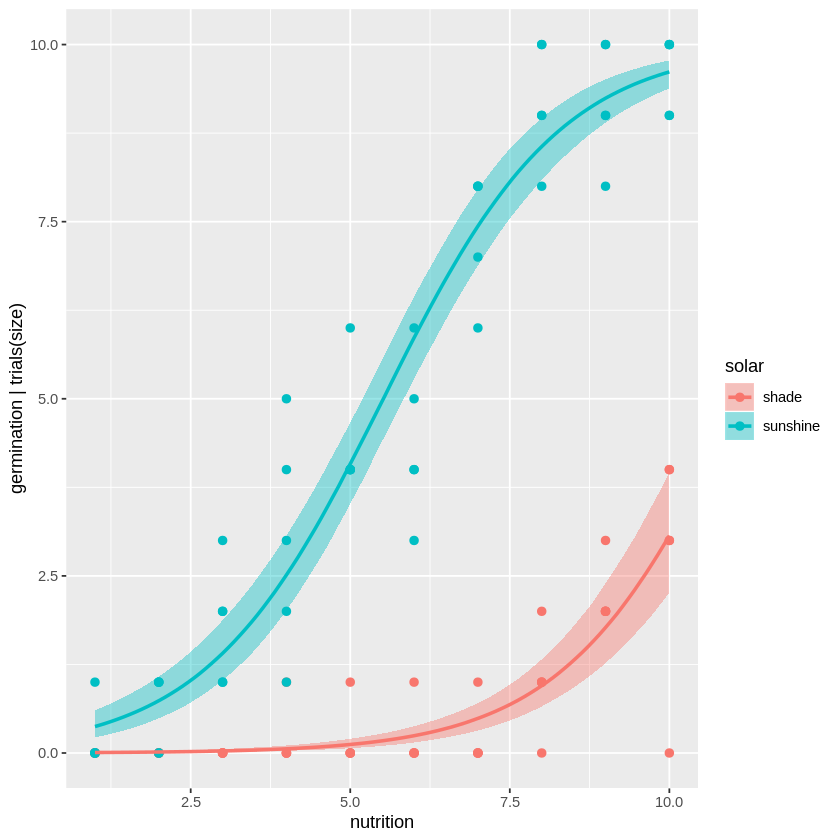

In [16]:
eff <- marginal_effects(glm_binom_brms, effects = "nutrition:solar")
plot(eff, points = TRUE)

Using the median number of trials by default if not specified otherwise.


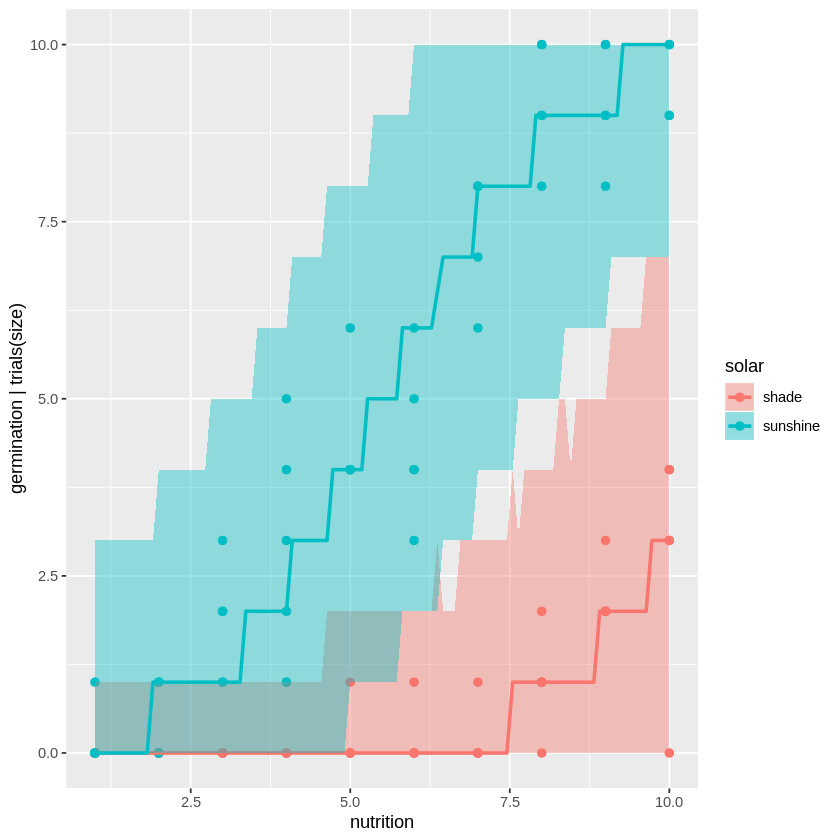

In [18]:
set.seed(1)
eff_pre <- marginal_effects(glm_binom_brms, method = "predict", effects = "nutrition:solar", probs=c(0.005, 0.995))
plot(eff_pre, points = TRUE)

Using the median number of trials by default if not specified otherwise.


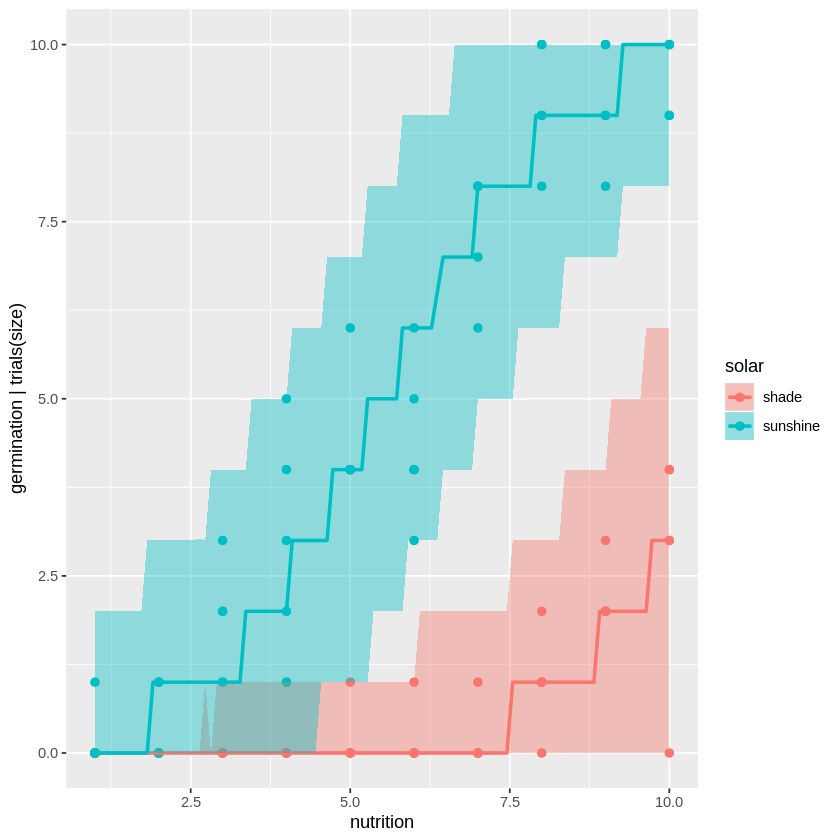

In [19]:
set.seed(1)
eff_pre <- marginal_effects(glm_binom_brms, method = "predict", effects = "nutrition:solar", probs=c(0.025, 0.975))
plot(eff_pre, points = TRUE)